<a href="https://colab.research.google.com/github/Jeshwanth2/AI-ML-Internship-Task-15/blob/main/MLPipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

# Load the Breast Cancer dataset
breast_cancer_data = load_breast_cancer()

X = pd.DataFrame(breast_cancer_data.data, columns=breast_cancer_data.feature_names)

y = pd.Series(breast_cancer_data.target, name='target')

print("Features (X) head:")
print(X.head())
print("\nTarget (y) head:")
print(y.head())

Features (X) head:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perime

In [2]:
print("--- Data types of features (X) ---")
X.info()

print("\n--- List of all feature names ---")
all_features = X.columns.tolist()
print(all_features)

--- Data types of features (X) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    floa

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# Create a StandardScaler object
scaler = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, all_features)
    ],
    remainder='passthrough'
)

print("Preprocessing ColumnTransformer:")
print(preprocessor)

Preprocessing ColumnTransformer:
ColumnTransformer(remainder='passthrough',
                  transformers=[('num', StandardScaler(),
                                 ['mean radius', 'mean texture',
                                  'mean perimeter', 'mean area',
                                  'mean smoothness', 'mean compactness',
                                  'mean concavity', 'mean concave points',
                                  'mean symmetry', 'mean fractal dimension',
                                  'radius error', 'texture error',
                                  'perimeter error', 'area error',
                                  'smoothness error', 'compactness error',
                                  'concavity error', 'concave points error',
                                  'symmetry error', 'fractal dimension error',
                                  'worst radius', 'worst texture',
                                  'worst perimeter', 'worst area',
            

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Instantiate a classifier
classifier = LogisticRegression(random_state=42, solver='liblinear')

# Create the pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', classifier)
])

print("Model Pipeline created:")
print(model_pipeline)

Model Pipeline created:
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['mean radius',
                                                   'mean texture',
                                                   'mean perimeter',
                                                   'mean area',
                                                   'mean smoothness',
                                                   'mean compactness',
                                                   'mean concavity',
                                                   'mean concave points',
                                                   'mean symmetry',
                                                   'mean fractal dimension',
                                                   'radius error',
                                              

In [5]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (455, 30)
Shape of X_test: (114, 30)
Shape of y_train: (455,)
Shape of y_test: (114,)


In [6]:
print("Training the model pipeline...")
model_pipeline.fit(X_train, y_train)
print("Model pipeline training complete.")

# Make predictions on the test data
y_pred = model_pipeline.predict(X_test)

print("\nFirst 5 predictions:")
print(y_pred[:5])
print("\nFirst 5 actual labels:")
print(y_test[:5].values)

Training the model pipeline...
Model pipeline training complete.

First 5 predictions:
[1 0 0 1 1]

First 5 actual labels:
[1 0 0 1 1]


In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.9737
Precision: 0.9722
Recall: 0.9859
F1-score: 0.9790


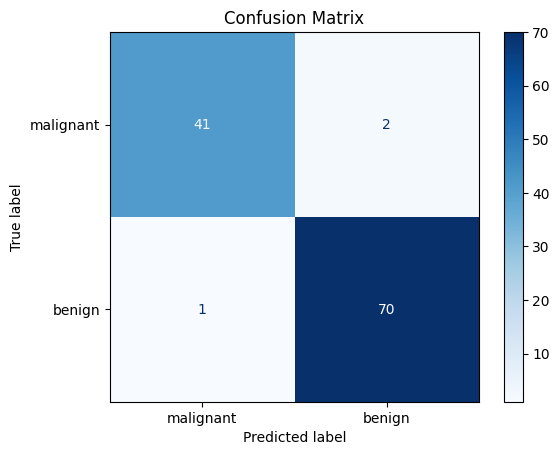

In [8]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt


# Create the confusion matrix display
disp = ConfusionMatrixDisplay.from_estimator(
    model_pipeline,
    X_test,
    y_test,
    display_labels=breast_cancer_data.target_names,
    cmap='Blues',
    normalize=None
)

disp.ax_.set_title("Confusion Matrix")

plt.show()


## Save Model

### Subtask:
Save the trained pipeline model to a file (e.g., using `joblib` or `pickle`) for future use.


**Reasoning**:
To save the trained pipeline model, I will use the `joblib` library to serialize the `model_pipeline` object to a file, then print a confirmation message.



In [9]:
import joblib

# Define the filename for the saved model
model_filename = 'breast_cancer_model_pipeline.joblib'

# Save the trained pipeline model to the file
joblib.dump(model_pipeline, model_filename)

print(f"Model pipeline successfully saved to '{model_filename}'")

Model pipeline successfully saved to 'breast_cancer_model_pipeline.joblib'
